In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import datetime
from IPython.display import display, HTML

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm

# Load zipcode data into dataframe and the training and test data into dataframes

In [22]:
zipcode_data = pd.read_csv('building-permit-applications-data/zipcode_data_all.csv')
building_data = pd.read_csv('data/data_train.csv')
zipcode_data

/home/nmorales/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Zipcode,Fire total,Fire Call Alarm,Fire Call Non Life-threatening,Fire Call Fire,Fire Call Potentially Life-Threatening,Fire Transport,Fire Priority 3,Business total,Business NAICS Retail Trade,...,Business NAICS Multiple,Business NAICS Private Education and Health Services,"Business NAICS Arts, Entertainment, and Recreation",Business NAICS Insurance,Business NAICS Utilities,Restaurant total,Restaurant inspection score,Restaurant low risk,Restaurant moderate risk,Restaurant high risk
0,94124.0,101591,19971,23503,7025,50877,28556,73666,7904,490,...,224,60,256,5,8,1499,85.806113,488,426,158
1,94116.0,42241,9479,10803,1373,20532,12053,30168,5006,234,...,98,222,219,24,7,810,83.569640,305,270,89
2,94111.0,36923,11962,7825,2016,15077,8502,27519,9124,342,...,111,197,99,149,6,1773,87.488705,623,494,193
3,94102.0,270699,52716,66162,3786,147674,82822,187870,10192,664,...,180,629,378,13,4,3789,86.529081,1334,976,376
4,94131.0,35650,11749,8370,1160,14308,9180,26455,4127,136,...,102,141,261,3,1,549,88.524631,266,133,34
5,94114.0,64835,17027,15379,2152,30215,16387,45996,8496,503,...,177,493,397,17,0,1673,88.458296,492,525,133
6,94121.0,52861,13226,12249,3610,23715,13315,38484,6366,337,...,133,189,249,13,4,1917,84.327186,680,557,256
7,94112.0,91487,18560,22878,2913,47004,27510,64128,7856,519,...,173,181,243,22,13,2333,84.850825,882,657,262
8,94108.0,47250,17425,9407,1280,19093,10563,35730,7329,849,...,150,343,139,26,4,2009,84.748252,753,588,221
9,94105.0,51351,15395,11689,1516,22725,12104,37056,8811,254,...,129,184,134,95,10,2104,86.037821,618,637,289


In [23]:
data_train = pd.read_csv('data/data_train_clean1.csv')
nrows_train, ncols_train = data_train.shape
print(f"Training dataset has {nrows_train} rows and {ncols_train} columns")

Training dataset has 159120 rows and 45 columns


In [24]:
data_train.describe()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,...,Proposed Construction Type,Supervisor District,Zipcode,Record ID,Filed Days,Issued Days,Issued or not,Days to issue,Latitude,Longitude
count,159120.000000,159120.000000,23571.000000,124975.000000,124912.000000,1.287550e+05,1.543180e+05,117952.000000,118451.000000,159120.000000,...,159120.000000,157760.000000,157760.000000,1.591200e+05,159120.000000,147226.000000,159120.000000,147226.000000,157772.000000,157772.000000
mean,7.523033,1121.984615,78.061941,5.704909,5.748119,1.776544e+05,1.396427e+05,15.552236,16.443947,1.740284,...,3.202545,5.541557,94115.507042,1.162524e+12,968.921437,973.138236,0.925251,26.202980,37.768730,-122.431815
std,1.456435,1135.655030,323.361038,8.592910,8.598126,3.920941e+06,3.867726e+06,73.233051,74.035060,1.397578,...,2.188812,2.885742,9.284674,4.912923e+11,539.029506,536.279454,0.262986,91.586112,0.023721,0.028581
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,1.000000,94102.000000,1.293532e+10,1.000000,1.000000,0.000000,0.000000,37.708170,-122.510938
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.311000e+03,1.000000e+00,1.000000,1.000000,0.000000,...,1.000000,3.000000,94109.000000,1.308561e+12,512.000000,520.000000,1.000000,0.000000,37.752209,-122.447303
50%,8.000000,711.000000,0.000000,3.000000,3.000000,1.100000e+04,7.000000e+03,1.000000,2.000000,2.000000,...,5.000000,6.000000,94114.000000,1.371854e+12,980.000000,986.000000,1.000000,0.000000,37.773412,-122.427700
75%,8.000000,1700.000000,1.000000,4.000000,4.000000,3.560000e+04,2.900000e+04,4.000000,4.000000,2.000000,...,5.000000,8.000000,94122.000000,1.434867e+12,1434.000000,1431.000000,1.000000,6.000000,37.788802,-122.409631
max,8.000000,8400.000000,6004.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,4.000000,...,5.000000,11.000000,94158.000000,1.498342e+12,1879.000000,1879.000000,1.000000,1734.000000,37.825017,-122.365853


In [25]:
data_test = pd.read_csv('data/data_test_clean1.csv')
nrows_test, ncols_test = data_test.shape
print(f"Testing dataset has {nrows_test} rows and {ncols_test} columns")

Testing dataset has 39780 rows and 45 columns


In [26]:
data_test.describe()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,...,Proposed Construction Type,Supervisor District,Zipcode,Record ID,Filed Days,Issued Days,Issued or not,Days to issue,Latitude,Longitude
count,39780.000000,39780.000000,5908.000000,31141.000000,31120.000000,3.207900e+04,3.851600e+04,29410.000000,29538.000000,39780.000000,...,39780.000000,39423.000000,39424.000000,3.978000e+04,39780.000000,36734.000000,39780.000000,36734.000000,39428.000000,39428.000000
mean,7.519482,1120.706259,80.333446,5.709242,5.732696,1.340407e+05,1.056654e+05,16.123087,16.779640,1.741001,...,3.200251,5.525784,94115.474609,1.160142e+12,976.296254,980.376218,0.923429,25.460391,37.768836,-122.431798
std,1.461523,1136.238212,341.065014,8.695553,8.673987,2.090947e+06,2.098990e+06,79.266563,79.798033,1.402760,...,2.191576,2.892233,9.211779,4.939345e+11,539.360158,536.428025,0.265913,88.927710,0.023767,0.028455
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,1.000000,94102.000000,1.301155e+10,1.000000,1.000000,0.000000,0.000000,37.708174,-122.510729
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.150000e+03,1.000000e+00,1.000000,1.000000,0.000000,...,1.000000,3.000000,94109.000000,1.308592e+12,521.000000,527.000000,1.000000,0.000000,37.752256,-122.447067
50%,8.000000,709.500000,0.000000,3.000000,3.000000,1.100000e+04,7.000000e+03,1.000000,2.000000,2.000000,...,5.000000,6.000000,94114.000000,1.371799e+12,989.000000,996.000000,1.000000,0.000000,37.773569,-122.427546
75%,8.000000,1690.000000,1.000000,4.000000,4.000000,3.500000e+04,2.785800e+04,4.000000,4.000000,2.000000,...,5.000000,8.000000,94122.000000,1.435691e+12,1443.000000,1443.000000,1.000000,6.000000,37.788879,-122.409770
max,8.000000,8400.000000,5903.000000,63.000000,63.000000,1.750000e+08,2.076800e+08,1907.000000,1907.000000,4.000000,...,5.000000,11.000000,94158.000000,1.498331e+12,1879.000000,1879.000000,1.000000,1740.000000,37.823350,-122.365853


# Join zipcode data into training and test dataframes

In [27]:
data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')

In [28]:
data_train = data_train.set_index('Zipcode').join(zipcode_data.set_index('Zipcode'))
data_test = data_test.set_index('Zipcode').join(zipcode_data.set_index('Zipcode'))

In [34]:
data_train.describe()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,...,Business NAICS Multiple,Business NAICS Private Education and Health Services,"Business NAICS Arts, Entertainment, and Recreation",Business NAICS Insurance,Business NAICS Utilities,Restaurant total,Restaurant inspection score,Restaurant low risk,Restaurant moderate risk,Restaurant high risk
count,159120.000000,159120.000000,159117.000000,159120.000000,159120.000000,1.591200e+05,1.591200e+05,159120.000000,159120.000000,159120.000000,...,159120.000000,159120.000000,159120.000000,159120.000000,159120.000000,159120.000000,159120.000000,159120.000000,159120.000000,159120.000000
mean,7.523033,1121.984615,76.386621,5.689077,5.734219,1.846691e+05,1.382333e+05,15.424279,16.276766,1.740284,...,187.456341,363.792138,357.069972,28.275371,5.564033,2500.055543,86.264951,885.629468,717.589008,274.467861
std,1.456435,1135.655030,315.694570,8.568205,8.562115,4.401148e+06,3.815610e+06,71.971117,72.941784,1.397578,...,87.422763,202.577936,240.620401,29.516633,4.612542,1516.878682,1.502431,547.877815,442.225003,182.730079
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,10.000000,3.000000,23.000000,0.000000,0.000000,3.000000,83.146648,0.000000,0.000000,0.000000
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.430000e+03,1.000000e+00,1.000000,1.000000,0.000000,...,122.000000,184.000000,219.000000,13.000000,2.000000,1327.000000,85.321321,492.000000,354.000000,121.000000
50%,8.000000,711.000000,0.000000,3.000000,3.000000,1.120000e+04,7.000000e+03,1.000000,1.000000,2.000000,...,177.000000,312.000000,261.000000,22.000000,4.000000,2039.000000,86.093900,680.000000,603.000000,242.000000
75%,8.000000,1700.000000,1.000000,4.000000,4.000000,3.600000e+04,2.900000e+04,4.000000,4.000000,2.000000,...,224.000000,533.000000,402.000000,28.000000,10.000000,3325.000000,87.184154,1334.000000,887.000000,380.000000
max,8.000000,8400.000000,6004.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,4.000000,...,368.000000,776.000000,991.000000,149.000000,16.000000,5921.000000,100.000000,2189.000000,1731.000000,670.000000


# Trying simple regression using restaurant data

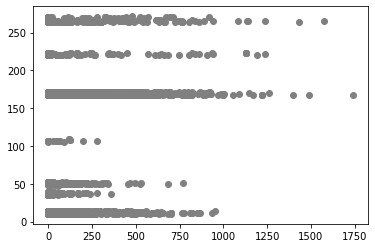

Mean Absolute Error: 30.67284405245935
Mean Squared Error: 5741.769384595926
Root Mean Squared Error: 75.7744639347315


In [30]:
y_train = data_train["Days to issue"]
nrows_train = y_train.shape

X_train = np.column_stack((
    np.ones(nrows_train), #Intercept
    data_train['Restaurant total'],
    pd.get_dummies(data_train['Permit Type'].to_numpy(dtype ='str'),dummy_na=True,prefix=['permit_type'])
))

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_test = data_test["Days to issue"]
nrows_test = y_test.shape

X_test = np.column_stack((
    np.ones(nrows_test), #Intercept
    data_test['Restaurant total'],
    pd.get_dummies(data_test['Permit Type'].to_numpy(dtype ='str'),dummy_na=True,prefix=['permit_type'])
))
X_test

y_pred = regressor.predict(X_test)

plt.scatter(y_test, y_pred,  color='gray')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Running this model with restaurant total has MSE of 5741 compared to 5742 without restarurant total.

# Trying simple regression with retaurant high risk

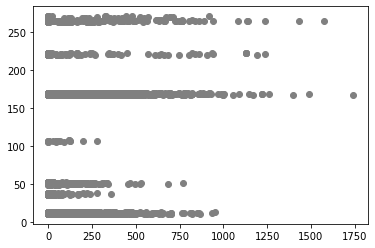

Mean Absolute Error: 30.669602456982336
Mean Squared Error: 5741.696759924486
Root Mean Squared Error: 75.77398471721338


In [32]:
y_train = data_train["Days to issue"]
nrows_train = y_train.shape

X_train = np.column_stack((
    np.ones(nrows_train), #Intercept
    data_train['Restaurant high risk'],
    pd.get_dummies(data_train['Permit Type'].to_numpy(dtype ='str'),dummy_na=True,prefix=['permit_type'])
))

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_test = data_test["Days to issue"]
nrows_test = y_test.shape

X_test = np.column_stack((
    np.ones(nrows_test), #Intercept
    data_test['Restaurant high risk'],
    pd.get_dummies(data_test['Permit Type'].to_numpy(dtype ='str'),dummy_na=True,prefix=['permit_type'])
))
X_test

y_pred = regressor.predict(X_test)

plt.scatter(y_test, y_pred,  color='gray')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

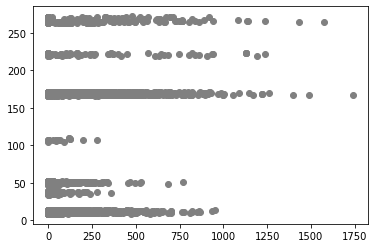

Mean Absolute Error: 30.677361037922978
Mean Squared Error: 5741.3825172969555
Root Mean Squared Error: 75.77191113662738


In [35]:
y_train = data_train["Days to issue"]
nrows_train = y_train.shape

X_train = np.column_stack((
    np.ones(nrows_train), #Intercept
    data_train['Business total'],
    data_train['Business NAICS Private Education and Health Services'],
    pd.get_dummies(data_train['Permit Type'].to_numpy(dtype ='str'),dummy_na=True,prefix=['permit_type'])
))

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_test = data_test["Days to issue"]
nrows_test = y_test.shape

X_test = np.column_stack((
    np.ones(nrows_test), #Intercept
    data_test['Business total'],
    data_test['Business NAICS Private Education and Health Services'],
    pd.get_dummies(data_test['Permit Type'].to_numpy(dtype ='str'),dummy_na=True,prefix=['permit_type'])
))
X_test

y_pred = regressor.predict(X_test)

plt.scatter(y_test, y_pred,  color='gray')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Adding business total and business education and health services does not change prediction much in simple regression